In [77]:
import pandas as pd
import numpy as np

hr_df = pd.read_csv(r'D:\PROJECT\Predicting which employee will quit\hr_data.csv')

In [78]:
hr_df

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,1003,2,157,3,0,1,0,sales,low
1,1005,5,262,6,0,1,0,sales,medium
2,1486,7,272,4,0,1,0,sales,medium
3,1038,5,223,5,0,1,0,sales,low
4,1057,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...
14994,87670,2,151,3,0,1,0,support,low
14995,87673,2,160,3,0,1,0,support,low
14996,87679,2,143,3,0,1,0,support,low
14997,87681,6,280,4,0,1,0,support,low


#### Numerical Analysis

In [79]:
hr_df.shape

(14999, 9)

In [80]:
#left column is target variable
hr_df.size

134991

In [81]:
#dataset contains any null value
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   employee_id            14999 non-null  int64 
 1   number_project         14999 non-null  int64 
 2   average_montly_hours   14999 non-null  int64 
 3   time_spend_company     14999 non-null  int64 
 4   Work_accident          14999 non-null  int64 
 5   left                   14999 non-null  int64 
 6   promotion_last_5years  14999 non-null  int64 
 7   department             14999 non-null  object
 8   salary                 14999 non-null  object
dtypes: int64(7), object(2)
memory usage: 1.0+ MB


In [82]:
#how much unique value in department column
hr_df['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [83]:
#how much unique value in salary column
hr_df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [84]:
#load another csv file ie.employee satisfaction file
sat_level = pd.read_excel(r'D:\PROJECT\Predicting which employee will quit\employee_satisfaction_evaluation.xlsx')

In [85]:
sat_level

,EMPLOYEE #,satisfaction_level,last_evaluation
0,1003,0.38,0.53
1,1005,0.80,0.86
2,1486,0.11,0.88
3,1038,0.72,0.87
4,1057,0.37,0.52
...,...,...,...
14994,87670,0.40,0.57
14995,87673,0.37,0.48
14996,87679,0.37,0.53
14997,87681,0.11,0.96


In [86]:
#merge two dataset together
main_df = hr_df.set_index('employee_id').join(sat_level.set_index('EMPLOYEE #'))

In [87]:
main_df

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
employee_id,,,,,,,,,,
1003,2,157,3,0,1,0,sales,low,0.38,0.53
1005,5,262,6,0,1,0,sales,medium,0.80,0.86
1486,7,272,4,0,1,0,sales,medium,0.11,0.88
1038,5,223,5,0,1,0,sales,low,0.72,0.87
1057,2,159,3,0,1,0,sales,low,0.37,0.52
...,...,...,...,...,...,...,...,...,...,...
87670,2,151,3,0,1,0,support,low,0.40,0.57
87673,2,160,3,0,1,0,support,low,0.37,0.48
87679,2,143,3,0,1,0,support,low,0.37,0.53


In [88]:
main_df.shape

(14999, 10)

In [89]:
main_df = main_df.reset_index()

In [90]:
main_df

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52
...,...,...,...,...,...,...,...,...,...,...,...
14994,87670,2,151,3,0,1,0,support,low,0.40,0.57
14995,87673,2,160,3,0,1,0,support,low,0.37,0.48
14996,87679,2,143,3,0,1,0,support,low,0.37,0.53
14997,87681,6,280,4,0,1,0,support,low,0.11,0.96


In [91]:
main_df.shape

(14999, 11)

In [92]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   employee_id            14999 non-null  int64  
 1   number_project         14999 non-null  int64  
 2   average_montly_hours   14999 non-null  int64  
 3   time_spend_company     14999 non-null  int64  
 4   Work_accident          14999 non-null  int64  
 5   left                   14999 non-null  int64  
 6   promotion_last_5years  14999 non-null  int64  
 7   department             14999 non-null  object 
 8   salary                 14999 non-null  object 
 9   satisfaction_level     14972 non-null  float64
 10  last_evaluation        14972 non-null  float64
dtypes: float64(2), int64(7), object(2)
memory usage: 1.3+ MB


In [93]:
#axis = 1 means rows and if 0 then columns
#print nan value
main_df[main_df.isnull().any(axis=1)]

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
18,3794,2,160,3,1,1,1,sales,low,NaN,NaN
19,1140,5,262,5,0,1,0,sales,low,NaN,0.89
33,1230,2,140,3,0,1,0,hr,low,NaN,NaN
53,1340,2,132,3,0,1,0,support,low,NaN,NaN
72,22316,2,149,3,0,1,0,product_mng,high,NaN,NaN
92,1581,2,143,3,0,1,0,sales,low,NaN,NaN
107,17376,2,148,3,0,1,0,accounting,medium,NaN,NaN
120,1739,4,158,4,1,1,0,technical,low,NaN,NaN
137,1847,2,129,3,0,1,0,management,low,NaN,NaN
175,32923,4,164,2,0,1,0,sales,low,NaN,NaN


In [94]:
#replace nan with mean
main_df.describe()
     

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14972.000000,14972.000000
mean,45424.627575,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,0.612830,0.716125
std,25915.900127,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.248714,0.171138
min,1003.000000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.090000,0.360000
25%,22872.500000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.440000,0.560000
50%,45448.000000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,0.640000,0.720000
75%,67480.500000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,0.820000,0.870000
max,99815.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [95]:
#fill null values
#inplace = true is for permanent change if it false then change is temporary
main_df.fillna(main_df.mean(),inplace=True)


In [96]:
#no null values present 
main_df[main_df.isnull().any(axis=1)]

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation


In [97]:
#we can see now nan values is replaced with min value
main_df.loc[main_df['employee_id']==1230]

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
33,1230,2,140,3,0,1,0,hr,low,0.61283,0.716125


In [98]:
main_df.drop(columns = 'employee_id',inplace=True)

In [99]:
main_df

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,2,157,3,0,1,0,sales,low,0.38,0.53
1,5,262,6,0,1,0,sales,medium,0.80,0.86
2,7,272,4,0,1,0,sales,medium,0.11,0.88
3,5,223,5,0,1,0,sales,low,0.72,0.87
4,2,159,3,0,1,0,sales,low,0.37,0.52
...,...,...,...,...,...,...,...,...,...,...
14994,2,151,3,0,1,0,support,low,0.40,0.57
14995,2,160,3,0,1,0,support,low,0.37,0.48
14996,2,143,3,0,1,0,support,low,0.37,0.53
14997,6,280,4,0,1,0,support,low,0.11,0.96


In [100]:
main_df.groupby('department').sum()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
department,,,,,,,,
IT,4683,248119,4256,164,273,3,758.17283,879.452250
RandD,3033,158030,2650,134,121,27,487.80000,560.446125
accounting,2934,154292,2702,96,204,14,446.68283,550.706125
hr,2701,146828,2480,89,215,15,442.53566,524.006125
management,2432,126787,2711,103,91,69,391.76566,456.234499
marketing,3164,171073,3063,138,203,43,530.62283,613.946125
product_mng,3434,180369,3135,132,198,0,559.19566,644.662250
sales,15634,831773,14631,587,1014,100,2543.77981,2938.236749
support,8479,447490,7563,345,555,20,1377.90849,1611.534499


In [101]:
main_df.groupby('department').mean()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
department,,,,,,,,
IT,3.816626,202.215974,3.468623,0.133659,0.222494,0.002445,0.617908,0.716750
RandD,3.853875,200.800508,3.367217,0.170267,0.153748,0.034307,0.619822,0.712130
accounting,3.825293,201.162973,3.522816,0.125163,0.265971,0.018253,0.582377,0.718000
hr,3.654939,198.684709,3.355886,0.120433,0.290934,0.020298,0.598830,0.709075
management,3.860317,201.249206,4.303175,0.163492,0.144444,0.109524,0.621850,0.724182
marketing,3.687646,199.385781,3.569930,0.160839,0.236597,0.050117,0.618442,0.715555
product_mng,3.807095,199.965632,3.475610,0.146341,0.219512,0.000000,0.619951,0.714703
sales,3.776329,200.911353,3.534058,0.141787,0.244928,0.024155,0.614440,0.709719
support,3.803948,200.758188,3.393001,0.154778,0.248991,0.008973,0.618173,0.722985


In [102]:
main_df['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

In [103]:
main_df['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

## Data Visualization

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

No handles with labels found to put in legend.


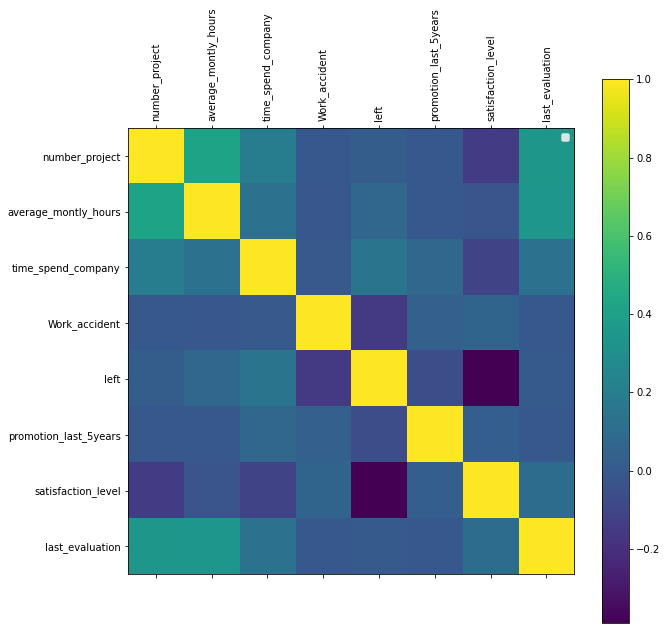

In [105]:
#correlation matrix
def plot_corr(df,size=10):
    corr = df.corr()
    fig,ax=plt.subplots(figsize=(size,size))
    ax.legend()
    cax = ax.matshow(corr)
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)),corr.columns,rotation='vertical')
    plt.yticks(range(len(corr.columns)),corr.columns)
    
plot_corr(main_df)
#from this matrix we can see there is great relation between satisfaction level and left    

<BarContainer object of 14999 artists>

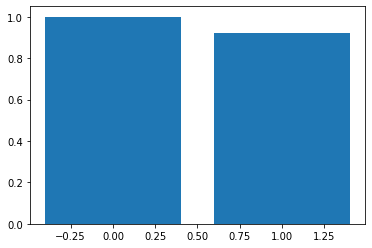

In [106]:
plt.bar(x=main_df['left'],height=main_df['satisfaction_level'])

<AxesSubplot:xlabel='left', ylabel='satisfaction_level'>

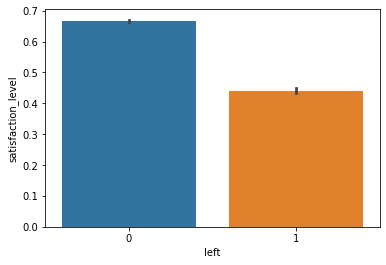

In [107]:
sns.barplot(x='left',y='satisfaction_level',data=main_df)

<AxesSubplot:xlabel='promotion_last_5years', ylabel='satisfaction_level'>

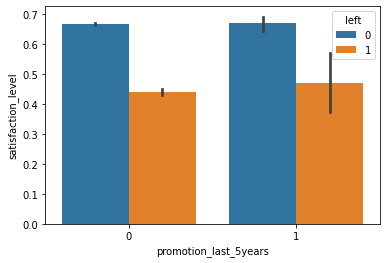

In [108]:
sns.barplot(x='promotion_last_5years',y='satisfaction_level',data=main_df,hue='left'
    )

## Data Preprocessing

In [109]:
#label encoding-model can't take data in string format so we have to convert all string data into numerical data
#standard scalar-

In [110]:
y = main_df[['department','salary']]

In [111]:
y

,department,salary
0,sales,low
1,sales,medium
2,sales,medium
3,sales,low
4,sales,low
...,...,...
14994,support,low
14995,support,low
14996,support,low
14997,support,low


In [112]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

k = le.fit_transform(main_df['salary'])

In [113]:
#convert salary string to int
k

array([1, 2, 2, ..., 1, 1, 1])

In [114]:
main_df

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,2,157,3,0,1,0,sales,low,0.38,0.53
1,5,262,6,0,1,0,sales,medium,0.80,0.86
2,7,272,4,0,1,0,sales,medium,0.11,0.88
3,5,223,5,0,1,0,sales,low,0.72,0.87
4,2,159,3,0,1,0,sales,low,0.37,0.52
...,...,...,...,...,...,...,...,...,...,...
14994,2,151,3,0,1,0,support,low,0.40,0.57
14995,2,160,3,0,1,0,support,low,0.37,0.48
14996,2,143,3,0,1,0,support,low,0.37,0.53
14997,6,280,4,0,1,0,support,low,0.11,0.96


In [115]:
main_df['salary_num']=k

In [116]:
main_df

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation,salary_num
0,2,157,3,0,1,0,sales,low,0.38,0.53,1
1,5,262,6,0,1,0,sales,medium,0.80,0.86,2
2,7,272,4,0,1,0,sales,medium,0.11,0.88,2
3,5,223,5,0,1,0,sales,low,0.72,0.87,1
4,2,159,3,0,1,0,sales,low,0.37,0.52,1
...,...,...,...,...,...,...,...,...,...,...,...
14994,2,151,3,0,1,0,support,low,0.40,0.57,1
14995,2,160,3,0,1,0,support,low,0.37,0.48,1
14996,2,143,3,0,1,0,support,low,0.37,0.53,1
14997,6,280,4,0,1,0,support,low,0.11,0.96,1


In [117]:
#for high=2,low=1,medium=2
main_df.loc[main_df['salary']=='high']

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation,salary_num
72,2,149,3,0,1,0,product_mng,high,0.61283,0.716125,0
111,6,289,4,0,1,0,hr,high,0.09000,0.850000,0
189,2,156,3,0,1,0,technical,high,0.44000,0.510000,0
267,2,129,3,0,1,0,technical,high,0.45000,0.530000,0
306,2,149,3,0,1,0,marketing,high,0.37000,0.460000,0
...,...,...,...,...,...,...,...,...,...,...,...
14829,2,148,3,0,1,0,marketing,high,0.45000,0.570000,0
14868,2,130,3,0,1,0,support,high,0.43000,0.550000,0
14902,2,159,3,0,1,0,hr,high,0.45000,0.460000,0
14941,2,131,3,0,1,0,RandD,high,0.43000,0.490000,0


In [118]:
main_df.drop(['salary'],axis=1,inplace=True)

In [119]:
l = le.fit_transform(main_df['department'])
main_df['deparment_num']=l
main_df.drop(['department'],axis=1,inplace=True)

In [120]:
main_df

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation,salary_num,deparment_num
0,2,157,3,0,1,0,0.38,0.53,1,7
1,5,262,6,0,1,0,0.80,0.86,2,7
2,7,272,4,0,1,0,0.11,0.88,2,7
3,5,223,5,0,1,0,0.72,0.87,1,7
4,2,159,3,0,1,0,0.37,0.52,1,7
...,...,...,...,...,...,...,...,...,...,...
14994,2,151,3,0,1,0,0.40,0.57,1,8
14995,2,160,3,0,1,0,0.37,0.48,1,8
14996,2,143,3,0,1,0,0.37,0.53,1,8
14997,6,280,4,0,1,0,0.11,0.96,1,8


In [121]:
x = main_df.drop(['left'],axis=1)
x

,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,satisfaction_level,last_evaluation,salary_num,deparment_num
0,2,157,3,0,0,0.38,0.53,1,7
1,5,262,6,0,0,0.80,0.86,2,7
2,7,272,4,0,0,0.11,0.88,2,7
3,5,223,5,0,0,0.72,0.87,1,7
4,2,159,3,0,0,0.37,0.52,1,7
...,...,...,...,...,...,...,...,...,...
14994,2,151,3,0,0,0.40,0.57,1,8
14995,2,160,3,0,0,0.37,0.48,1,8
14996,2,143,3,0,0,0.37,0.53,1,8
14997,6,280,4,0,0,0.11,0.96,1,8


In [122]:
y=main_df['left']
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [123]:
y.value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [124]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train, y_test = train_test_split(x,y,test_size=0.3)

In [125]:
x_train

,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,satisfaction_level,last_evaluation,salary_num,deparment_num
1970,5,132,6,0,0,0.53,0.76,1,0
9582,2,123,3,0,0,0.43,0.51,2,9
6499,4,260,4,0,0,0.85,0.73,1,7
1883,2,157,3,0,0,0.37,0.54,1,8
10519,4,228,2,1,0,0.65,0.74,2,0
...,...,...,...,...,...,...,...,...,...
5676,3,150,3,0,0,0.73,0.54,2,7
11234,4,167,4,0,0,0.99,0.94,1,8
9516,5,265,3,0,0,0.58,0.97,1,8
657,2,130,3,0,0,0.43,0.55,0,8


## Model classification

### 1)Decision Tree

In [126]:
from sklearn.metrics import accuracy_score

In [127]:
#train a model
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [128]:
#test the model
prediction_dt = dt.predict(x_test)

In [129]:
accuracy_dt =accuracy_score(y_test,prediction_dt)*100

In [130]:
accuracy_dt

97.26666666666667

In [131]:
category = ["Employee will stay",'Employee will leave']

In [132]:
custom_dt = [[2,500,5,3,2,0.7,0.89,2,5]]


In [133]:
print(dt.predict(custom_dt))

[1]


c:\users\priya k\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [134]:
category[int(dt.predict(custom_dt))]

c:\users\priya k\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


'Employee will leave'

In [135]:
custom_dt = [[1,500,3,3,2,0.7,0.89,1,5]]
category[int(dt.predict(custom_dt))]

c:\users\priya k\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


'Employee will leave'

In [136]:
dt.feature_importances_

array([1.03878596e-01, 1.01785742e-01, 1.40326809e-01, 1.30262826e-03,
       2.41270086e-05, 5.01644152e-01, 1.34679560e-01, 3.56437826e-03,
       1.27940076e-02])

In [137]:
feature_importance=pd.DataFrame(dt.feature_importances_,index =x_train.columns,columns=['Importance']).sort_values('Importance',ascending=False)

In [138]:
feature_importance

,Importance
satisfaction_level,0.501644
time_spend_company,0.140327
last_evaluation,0.134680
number_project,0.103879
average_montly_hours,0.101786
deparment_num,0.012794
salary_num,0.003564
Work_accident,0.001303
promotion_last_5years,0.000024


## 2)KNN

In [139]:
#knn need scalar data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(x_train)

In [140]:
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

In [141]:
x_train_std

array([[ 0.96296875, -1.37813248,  1.70652458, ...,  0.24991781,
        -0.55979998, -2.03394454],
       [-1.46581301, -1.55753599, -0.34862586, ..., -1.20926979,
         1.03773739,  1.10138538],
       [ 0.15337483,  1.17338414,  0.33642428, ...,  0.0748153 ,
        -0.55979998,  0.4046454 ],
       ...,
       [ 0.96296875,  1.27305276, -0.34862586, ...,  1.47563539,
        -0.55979998,  0.75301539],
       [-1.46581301, -1.41799992, -0.34862586, ..., -0.97579977,
        -2.15733734,  0.75301539],
       [ 0.15337483,  0.69497478, -0.34862586, ...,  1.12543037,
        -0.55979998,  1.10138538]])

In [142]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train_std,y_train)

KNeighborsClassifier(n_neighbors=3)

In [143]:
prediction_knn = knn.predict(x_test_std)


In [144]:
accuracy_knn = accuracy_score(y_test,prediction_knn)*100
accuracy_knn


95.75555555555556

In [145]:
prediction_knn

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [146]:
x_knn = np.array([[1,500,3,6,0,0.90,0.89,1,8]])
x_knn_std = sc.transform(x_knn)

c:\users\priya k\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [147]:
x_knn_std

array([[-2.27540693,  5.9574778 , -0.34862586, 16.53531786, -0.15131278,
         1.1581652 ,  1.00869536, -0.55979998,  0.75301539]])

In [148]:
x_knn_prediction=knn.predict(x_knn_std)
category[int(knn.predict(x_knn_std))]

'Employee will stay'

C:\Users\Priya K\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


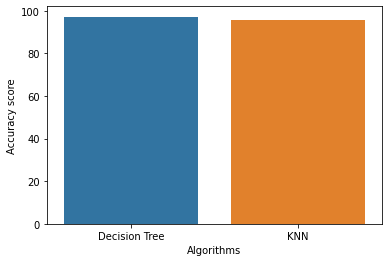

In [149]:
algorithms = ['Decision Tree' , 'KNN']
scores = [accuracy_dt,accuracy_knn]
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
sns.barplot(algorithms,scores)
plt.show()


C:\Users\Priya K\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

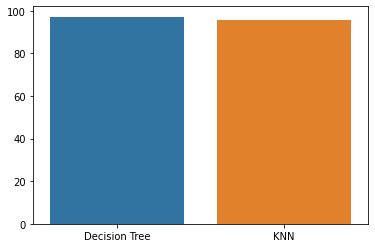

In [150]:
sns.barplot(algorithms,scores)